In [5]:
import os
import shutil

carpeta_fuente= 'cuchara/'
carpeta_destino= '_datasets/cuchara/'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    if i < 29:
        shutil.copy(carpeta_fuente + '/'+nombreimg, carpeta_destino + '/' + nombreimg)




In [6]:

carpeta_fuente= 'cuchillo/'
carpeta_destino= '_datasets/cuchillo/'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    if i < 29:
        shutil.copy(carpeta_fuente + '/'+nombreimg, carpeta_destino + '/' + nombreimg)




In [7]:

carpeta_fuente= 'tenedores/'
carpeta_destino= '_datasets/tenedores/'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    if i < 29:
        shutil.copy(carpeta_fuente + '/'+nombreimg, carpeta_destino + '/' + nombreimg)




Found 82 images belonging to 3 classes.


Found 18 images belonging to 3 classes.


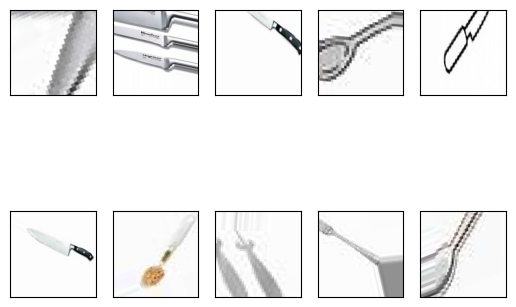

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as plt
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
 validation_split = 0.2

)
data_gen_entrenamiento = datagen.flow_from_directory('_datasets/', target_size=(150, 150), batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('_datasets/', target_size=(150, 150), batch_size=32, shuffle=True, subset='validation')
# Define the source and destination directories
for imagenes, etiqueta in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagenes[i])
    break
plt.show()

In [10]:
import sys
sys.path.append("C:\\tensorflow")
import tensorflow as tf

import tensorflow_hub as hub

# Use a TensorFlow 2 compatible model URL
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

AttributeError: module 'tensorflow._api.v2.compat.v1' has no attribute 'estimator'

In [5]:
mobilenetv2.trainable = False


NameError: name 'mobilenetv2' is not defined

In [ ]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
    
])

NameError: name 'mobilenetv2' is not defined

In [ ]:
modelo.sumary()

In [ ]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
EPOCAS = 50

historial = modelo.fit(data_gen_entrenamiento, epochs=EPOCAS, validation_data=data_gen_pruebas)

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']


rango_epocas = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label='PRecision Entramanieto ')
plt.plot(rango_epocas, val_acc, label='Precision Validacion')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label='Perdida Entrenamiento')
plt.plot(rango_epocas, val_loss, label='Perdida Validacion')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()